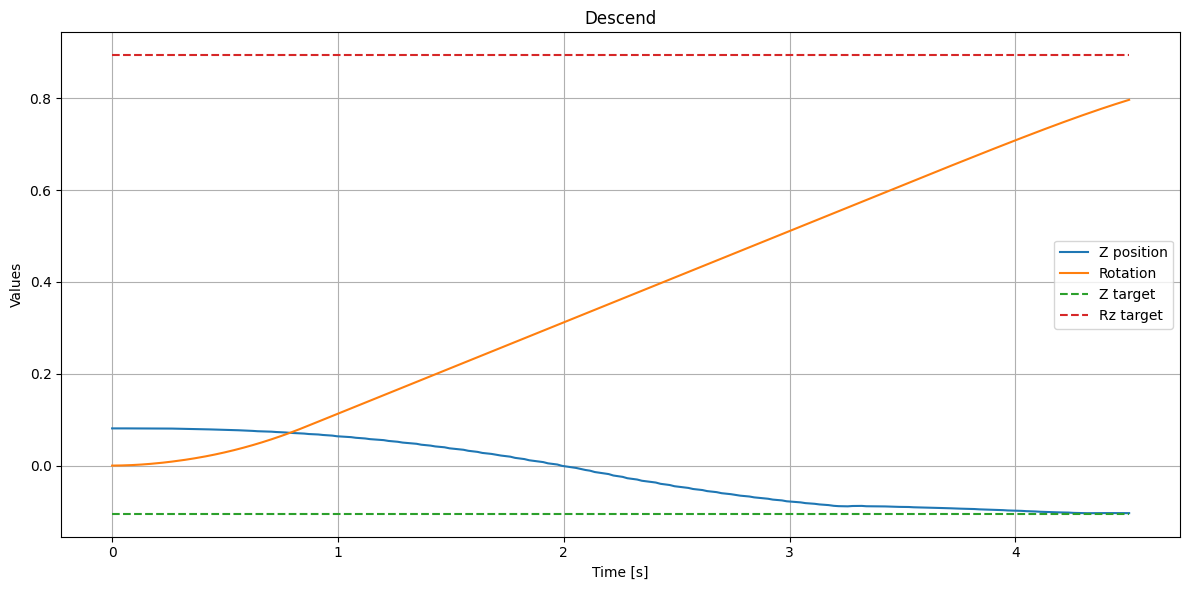

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("descend/positions_2025-07-10_17-22-51.csv")

# Optional: convert raw timestamp to relative time
df["relative_time"] = df["time"] - df["time"].iloc[0]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df["relative_time"], df["z_pos"], label="Z position")
plt.plot(df["relative_time"], df["rotation"], label="Rotation")
plt.plot(df["relative_time"], df["z_target"], label="Z target", linestyle="--")
plt.plot(df["relative_time"], df["rz_target"], label="Rz target", linestyle="--")

plt.xlabel("Time [s]")
plt.ylabel("Values")
plt.title("Descend")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()